## Quantum Teleportation with Qiskit
Ref: https://qiskit.org/textbook/ch-algorithms/teleportation.html

#### Basic Idea

Alice wants to send a qubit state $|\psi\rangle$ to Bob  
$|\psi \rangle=a|0 \rangle+b|1\rangle$

No-cloning Theorem $=>$ cannot copy an unknown quantum state

However, by taking advantage of two classical bits and an entangled qubit pair, Alice can transfer her state  
$|\psi\rangle$ to Bob.

#### Steps involved in Quantum Teleportaion

* Step1: Create an Entangled qubit pair,$|\phi\rangle$, from qubits q1 and q2
* Step2: Send one of the entangles qubit to Alice, say q1, and the other one,q2, to Bob.<br>
* Step3: Alice performs some operations on her qubit (q1) with $\psi$ as control. The result is then sent to Bob via classical channel
* Step4: Upon receiving the informatiob, Bob performation certain operations to recover state $\psi$

#### Step 1

let $\phi$ represent the entangled qubit pair. This can be acheived by applying a Hadamard gate and a CNOT gate.<br>
$|\phi \rangle=\frac{1}{\sqrt 2}(|00\rangle+|11\rangle)$

#### Step 2

Alice gets the first qubit and Bob gets the second

#### State of three qubit pair

$|\psi \rangle = a|0\rangle+b|1\rangle$

$|\psi \rangle \times |\phi \rangle = (a|0\rangle+b|1\rangle) \times \frac{1}{\sqrt 2}(|00\rangle+|11\rangle)$

$\frac{1}{\sqrt 2}(a|000\rangle+a|011\rangle+b|100\rangle+b|111\rangle)$

#### Step 3

Quantum Operations Alice Performs:

Alice Applies CNOT gate to q1 (middle qubit in above representation), controlled by $|\psi\rangle$ (first qubit in above representation), followed by Hadamard gate to $|\psi\rangle$

This will result in:

$\frac{1}{2}(|00\rangle(a|0\rangle+b|1\rangle)\\+|01\rangle(a|1\rangle+b|0\rangle)\\+|10\rangle(a|0\rangle-b|1\rangle)\\+|11\rangle(a|1\rangle-b|0\rangle))$

Alice will measure the first two qubits. The result she will obtain will always be one of four standard basis states. $|00\rangle, 01\rangle, 10\rangle, 11\rangle$
This information is sent to Bob through classical channel.

#### Step 4

Upon receiving the information, Bob can recover state $|\psi\rangle$ by applying appropriate gates

00  → Do nothing

01  → Apply X gate

10  → Apply Z gate

11  → Apply ZX gate

https://www.nature.com/news/quantum-teleportation-is-even-weirder-than-you-think-1.22321

#### Quantum Teleportation Protocol

In [1]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex

Create our Quantum Circuit

In [2]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target

In [3]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

In [4]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

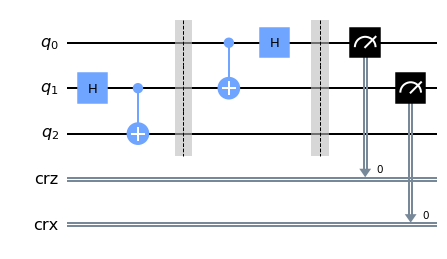

In [5]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers

qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
teleportation_circuit = QuantumCircuit(qr, crz, crx)

# STEP 1
# In our case, Telamon entangles qubits q1 and q2
# Let's apply this to our circuit:
create_bell_pair(teleportation_circuit, 1, 2)
# And view the circuit so far:
teleportation_circuit.draw('mpl')

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw('mpl')

## STEP 3
measure_and_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw('mpl')

In [6]:
# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

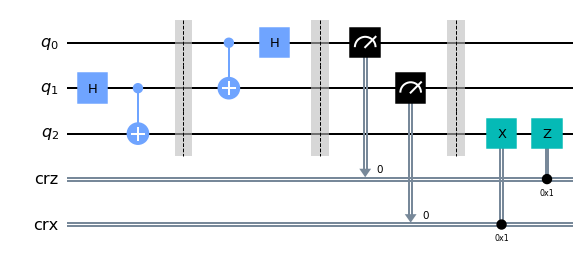

In [7]:
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
measure_and_send(teleportation_circuit, 0, 1)

## STEP 4
teleportation_circuit.barrier() # Use barrier to separate steps
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw('mpl')

### Simulating the Teleportation protocol

<IPython.core.display.Math object>

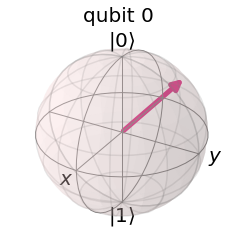

In [8]:
# Create random 1-qubit state
psi = random_state(1)

# Display it nicely
array_to_latex(psi, pretext="|\\psi\\rangle =")
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

In [9]:
init_gate = Initialize(psi)
init_gate.label = "init"

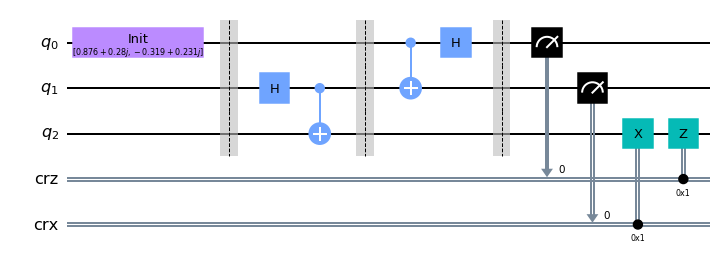

In [10]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

# Display the circuit
qc.draw('mpl')

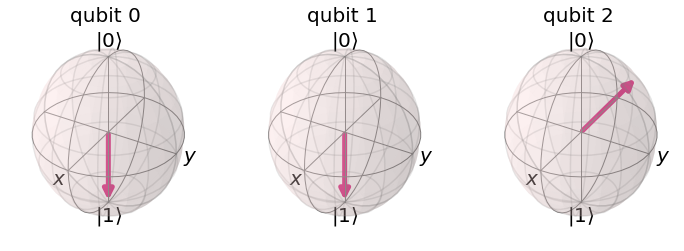

In [11]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

### Using the QASM Simulator

In [12]:
inverse_init_gate = init_gate.gates_to_uncompute()

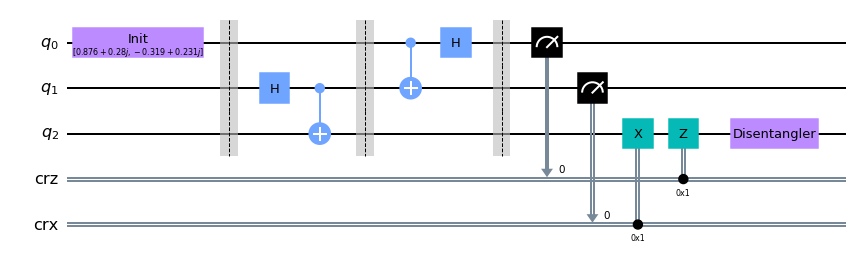

In [13]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

## STEP 5
# reverse the initialization process
qc.append(inverse_init_gate, [2])

# Display the circuit
qc.draw('mpl')

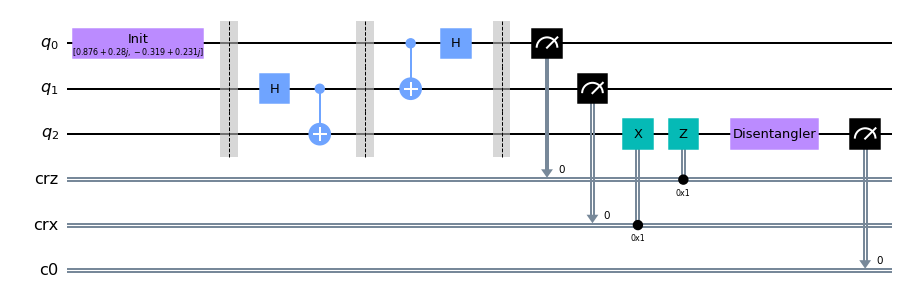

In [14]:
# Need to add a new ClassicalRegister
# to see the result
cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
qc.draw('mpl')

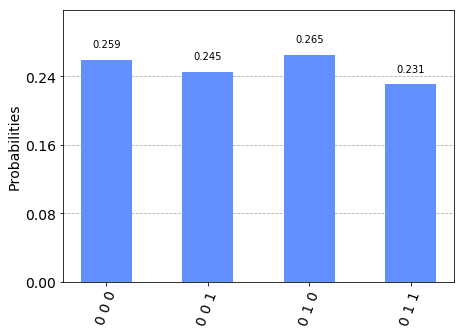

In [15]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, qasm_sim)
qobj = assemble(t_qc)
counts = qasm_sim.run(qobj).result().get_counts()
plot_histogram(counts)